In [1]:
import numpy as np

class FenicsFunctionSupportBoxGetter:
    # https://github.com/NickAlger/helper_functions/blob/master/fenics_function_support_box_getter.ipynb
    def __init__(me, function_space_V):
        me.V = function_space_V
        me.X = me.V.tabulate_dof_coordinates()
        me.N, me.d = me.X.shape

    def get_function_support_box(me, u, support_atol=1e-6, support_rtol=1e-3):
        au = np.abs(u.vector()[:])
        u_nonzero_mask_rtol = (au / np.max(au) > support_rtol)
        u_nonzero_mask_atol = (au > support_atol)
        u_nonzero_mask = np.logical_and(u_nonzero_mask_rtol, u_nonzero_mask_atol)
        
        nonzero_pts = me.X[u_nonzero_mask, :].reshape((-1, me.d))
        min_pt = np.min(nonzero_pts, axis=0)
        max_pt = np.max(nonzero_pts, axis=0)
        return min_pt, max_pt

# Test

Text(0.5, 1.0, 'rtol: inner=10%, outer=1%')

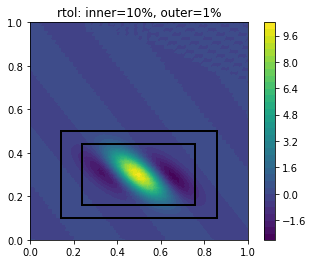

In [2]:
import dolfin as dl
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def plot_rectangle(minpt, maxpt, edgecolor='k'):
    delta = maxpt - minpt
    rect = patches.Rectangle(minpt, delta[0], delta[1], linewidth=2, edgecolor=edgecolor, facecolor='none')
    plt.gca().add_patch(rect)

mesh = dl.UnitSquareMesh(50, 50)
V = dl.FunctionSpace(mesh, 'CG', 1)

e1 = dl.Expression('-10*sin(15*x[0] + 12*x[1])', domain=mesh, degree=5)
e2 = dl.Expression('-exp(-pow(6*(x[0]-0.5) + 10*(x[1]-0.3), 2))', domain=mesh, degree=5)
e3 = dl.Expression('-exp(-pow(3*(x[0]-0.5) - 6*(x[1]-0.3), 2))', domain=mesh, degree=5)

u = dl.project(e1*e2*e3, V)
cm = dl.plot(u)
plt.colorbar(cm)

V_box_getter = FenicsFunctionSupportBoxGetter(V)

min_pt1, max_pt1 = V_box_getter.get_function_support_box(u, support_rtol=1e-1)
min_pt2, max_pt2 = V_box_getter.get_function_support_box(u, support_rtol=1e-2)


plot_rectangle(min_pt1, max_pt1)
plot_rectangle(min_pt2, max_pt2)
plt.title('rtol: inner=10%, outer=1%')